This notebook has been designed for the cooking challenge competition. It has been made by Paula Lago. 

# Exploring the data

In [55]:
import pandas as pd
import glob
import numpy as np
%matplotlib inline  
# enable plots to be shown in the notebook

First we will try to read one file and explore the data. We will use glob to get all files in one folder. Glob searches all files that match a query string. In this case, we want all files inside the right arm folder with csv extension.

In [56]:
data_folder = 'right_arm/*.csv' 
files = glob.glob(data_folder)

The files variable now contains all the files that matched our query.

In [57]:
print(len(files))
print(files[:10]) #Print the first ten file names

288
['right_arm/subject3_file_680.csv', 'right_arm/subject3_file_694.csv', 'right_arm/subject3_file_482.csv', 'right_arm/subject1_file_248.csv', 'right_arm/subject2_file_687.csv', 'right_arm/subject3_file_284.csv', 'right_arm/subject2_file_877.csv', 'right_arm/subject1_file_300.csv', 'right_arm/subject2_file_650.csv', 'right_arm/subject2_file_136.csv']


Let's read one of the files and see what it contains

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114559b70>,
      dtype=object)

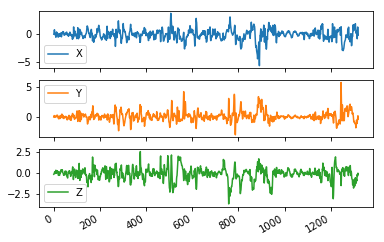

In [58]:
arm_data = pd.read_csv(files[0])
arm_data.plot(subplots=True)

Let's read the labels file to identify what is the activity for this file. We will first read the file into a single column.

In [59]:
labels = pd.read_csv("labels.txt", sep=' ', header=None)
labels.head()

,0
0,"subject1_file_111,fruitsalad,Take,Add,Mix,"
1,"subject1_file_113,cereal,Take,"
2,"subject1_file_116,cereal,Take,Open,Cut,Peel,"
3,"subject1_file_119,sandwich,Take,"
4,"subject1_file_131,sandwich,Cut,other,"


We will now split the file identifier and the macro activity into separate columns using the split method

In [60]:
labels = labels[0].str.split(",", n=2, expand=True)
labels.columns = ['file_id', 'macro', 'micro'] #give names to the columns
labels.index = labels['file_id'] #use the file id as index to make it searchable by file_id
labels.head()

,file_id,macro,micro
file_id,,,
subject1_file_111,subject1_file_111,fruitsalad,"Take,Add,Mix,"
subject1_file_113,subject1_file_113,cereal,"Take,"
subject1_file_116,subject1_file_116,cereal,"Take,Open,Cut,Peel,"
subject1_file_119,subject1_file_119,sandwich,"Take,"
subject1_file_131,subject1_file_131,sandwich,"Cut,other,"


Now, let's see what are the activities for the file we read. We need the file id, which is the name of the file without the folder and without the .csv extension

In [61]:
file_id = files[0][files[0].find("/")+1:files[0].find(".")]
print(file_id)

subject3_file_680


In [62]:
labels.loc[file_id]

file_id    subject3_file_680
macro               sandwich
micro         Put,Cut,other,
Name: subject3_file_680, dtype: object

The file corresponds to making sandwich, and there are three micro activities: Put, Cut and other. Let's see the other sensors from the same file.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1146e5048>,
      dtype=object)

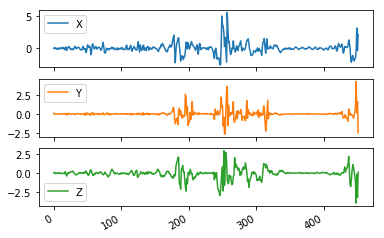

In [63]:
hip_data = pd.read_csv("left_hip/"+file_id+".csv")
hip_data.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114c43048>,
      dtype=object)

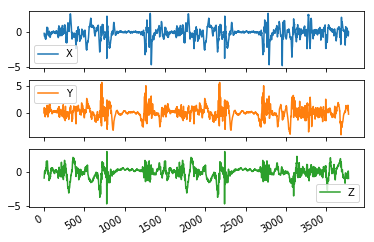

In [64]:
lwrist_data = pd.read_csv("left_wrist/"+file_id+".csv")
lwrist_data.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1154859e8>,
      dtype=object)

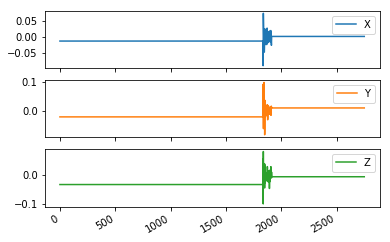

In [65]:
rwrist_data = pd.read_csv("right_wrist/"+file_id+".csv")
rwrist_data.plot(subplots=True)

As you can see, sometimes the data is noisy or missing. You need to decide how to handle such potential errors.